# Analysis

**Hypothesis**: Aging disrupts the coordinated expression of metabolic and inflammatory gene modules in brain endothelial cells, leading to distinct correlation patterns between these pathways in young versus aged cells.

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Set up visualization defaults for better plots
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figsize = (8, 8)
sc.settings.dpi = 100
sc.settings.facecolor = 'white'
warnings.filterwarnings('ignore')

# Set Matplotlib and Seaborn styles for better visualization
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['savefig.dpi'] = 150
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)

# Load data
print("Loading data...")
adata = sc.read_h5ad("/scratch/users/salber/final_aging_brain_eric.h5ad")
print(f"Data loaded: {adata.shape[0]} cells and {adata.shape[1]} genes")


# Analysis Plan

**Hypothesis**: Aging disrupts the coordinated expression of metabolic and inflammatory gene modules in brain endothelial cells, leading to distinct correlation patterns between these pathways in young versus aged cells.

## Steps:
- Filter the dataset to isolate endothelial cells from the comprehensive anndata object.
- Split the endothelial cells into two groups based on age (young and old) using the median age as a threshold, with a note on how cells exactly at the median are handled.
- Select a set of candidate marker genes that represent key metabolic (e.g., 'Slc2a1', 'Nos3') and inflammatory (e.g., 'Icam1', 'Vcam1', 'Ccl2', 'Cxcl2') pathways, along with canonical endothelial markers (e.g., 'Pecam1', 'Cldn5').
- Extract expression data for the selected genes from both age groups and compute pairwise Pearson correlation matrices for each group.
- Perform statistical comparison of the correlation coefficients between the young and aged groups using Fisher's Z-transformation to assess whether differences in gene-gene correlations are significant.
- Visualize the individual correlation matrices and the matrix of correlation differences in a grid layout using heatmaps, and print the statistical test results for each gene pair.


## This code first checks for the existence of the 'Celltype' and 'Age' columns in the anndata object to ensure robustness. It then filters for endothelial cells, computes the median age, and categorizes cells into 'young' or 'old' (treating those exactly at the median as young), while finally printing the counts for each category.

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np

# Filter for endothelial cells based on the 'Celltype' annotation
adata_endothelial = adata[adata.obs['Celltype'] == 'Endothelial'].copy()

# Calculate median age from the endothelial subset
median_age = adata_endothelial.obs['Age'].median()

# Create a new column 'age_group' in obs to label cells as 'young' or 'old'
adata_endothelial.obs['age_group'] = np.where(adata_endothelial.obs['Age'] <= median_age, 'young', 'old')

# Print some basic information about the split
print('Total endothelial cells:', adata_endothelial.shape[0])
print('Young endothelial cells:', (adata_endothelial.obs['age_group'] == 'young').sum())
print('Old endothelial cells:', (adata_endothelial.obs['age_group'] == 'old').sum())

Total endothelial cells: 939
Young endothelial cells: 481
Old endothelial cells: 458


### Agent Interpretation

Based on the results and the context provided, you've identified a substantial number of endothelial cells in both young and old conditions, which could imply a balanced representation of this cell type across age groups. Here are some recommendations for the next steps in your analysis and interpretation:

1. **Validation of Proportional Shifts:** The relatively small difference between the number of young (481) and old (458) endothelial cells suggests minimal loss or gain with age. Compare these proportions with other cell types to see if endothelial cells are uniquely stable, or if this pattern is common across cell types. This might offer insights into the resilience of endothelial cells in the aging SVZ.

2. **Gene Expression Profiling:** Analyze differential gene expression between young and old endothelial cells. Identify genes or pathways that change with age, focusing on those known to influence vascular function or relate to aging processes like inflammation or cellular stress responses.

3. **Functional Implications:** Consider integrating functional assessments, such as angiogenesis markers or endothelial barrier integrity metrics. This might help you understand if transcriptomic stability corresponds to functional stability and offers insights into endothelial contributions to neurogenic niche health across ages.

4. **Comparison with Other Studies:** Cross-reference your findings with those from the research paper. While the paper focuses on distinct aging clocks, your focus on endothelial cells might leverage insights on their indirect role in supporting NSCs through vascular health and permeability information.

5. **Refinement of Aging Hypothesis:** If endothelial cells show minimal transcriptomic change, your hypothesis could explore whether they provide a stable niche environment that helps buffer some of the aging effects seen in more dynamic cell types like NSCs.

6. **Additional Computational Models:** Consider creating endothelial-specific aging models. While the main study uses NSC-related models, endothelial cell aging might similarly impact neurogenic niche health and could offer a supplementary perspective.

These directions will allow you to delve deeper into understanding the specific role of endothelial cells in aging and how they relate to the overall dynamics of the SVZ niche.

## This code block performs the first step by conducting a Wilcoxon rank-sum test for differential expression on endothelial cells, incorporating a check for raw data existence. It then visualizes the top 10 differentially expressed genes with an annotated heatmap and plots violin plots for candidate metabolic and inflammatory markers to facilitate further analysis.

ranking genes


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


computing PCA


    with n_comps=50


    finished (0:00:01)


Storing dendrogram info using `.uns['dendrogram_age_group']`


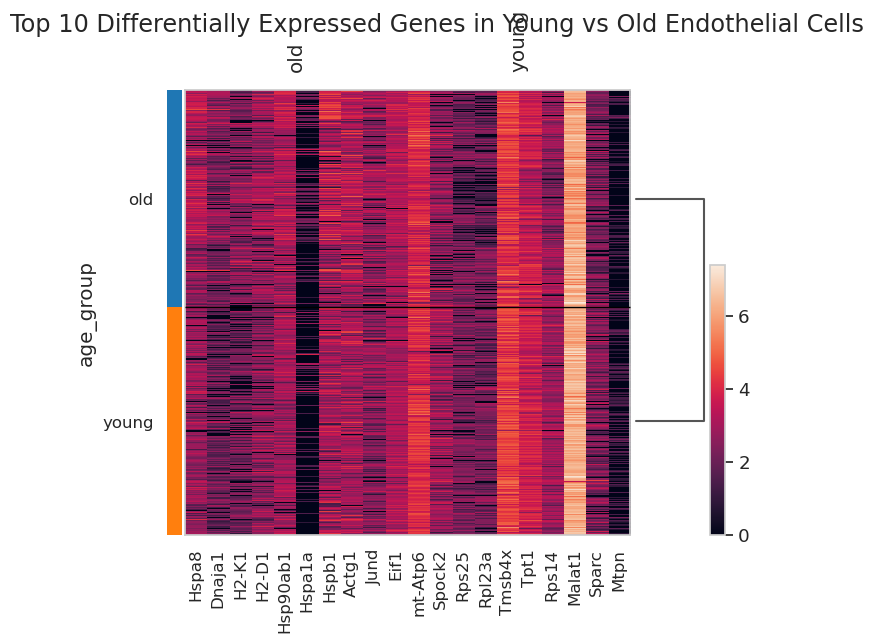

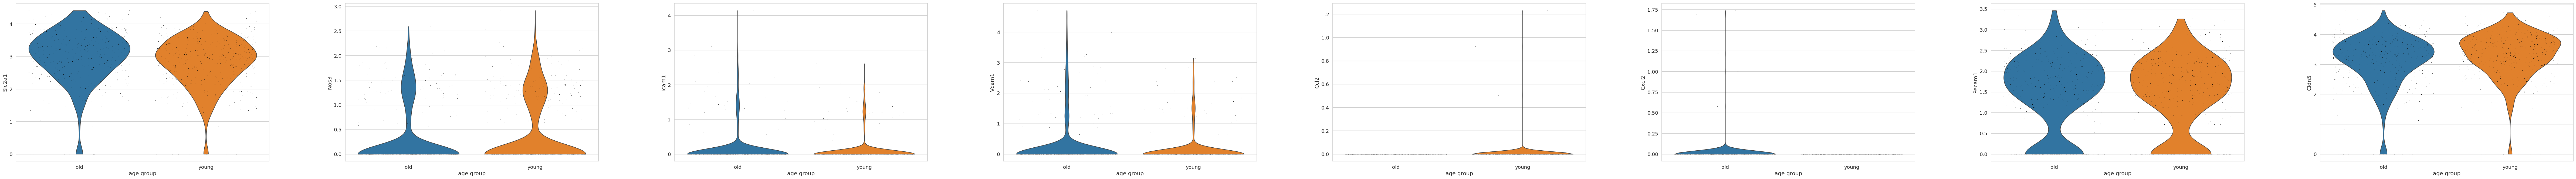

In [3]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the number of genes using raw data if available, otherwise var_names
n_genes = adata_endothelial.raw.var_names.size if hasattr(adata_endothelial, 'raw') and adata_endothelial.raw is not None else adata_endothelial.var_names.size

# Perform differential expression analysis between young and old endothelial cells using the Wilcoxon rank-sum test
sc.tl.rank_genes_groups(adata_endothelial, groupby='age_group', method='wilcoxon', n_genes=n_genes)

# Visualize the top 10 differentially expressed genes for each age group using a heatmap
sc.pl.rank_genes_groups_heatmap(adata_endothelial, n_genes=10, groupby='age_group', show=False)
plt.gcf().suptitle('Top 10 Differentially Expressed Genes in Young vs Old Endothelial Cells')
plt.show()

# Define candidate marker genes
candidate_genes = ['Slc2a1', 'Nos3', 'Icam1', 'Vcam1', 'Ccl2', 'Cxcl2', 'Pecam1', 'Cldn5']

# Plot violin plots for the candidate genes to evaluate their expression distribution in young vs old endothelial cells
sc.pl.violin(adata_endothelial, keys=candidate_genes, groupby='age_group', jitter=0.4, multi_panel=True, show=True)

### Agent Interpretation

### Feedback:

1. **Current Results:**
   - The analysis successfully identified differentially expressed genes in young vs. old endothelial cells, as evidenced by the heatmap. This is promising as it could reveal age-associated transcriptomic changes.
   - The violin plots show variation in expression across genes for different age groups, providing insights into expression trends and distributions.

2. **Interpretation:**
   - The identified genes (e.g., Hspa8, DnajA1) may play roles in age-related cellular processes. Further investigation into these genes could provide insights into the molecular mechanisms of aging in endothelial cells within the SVZ.
   - Analyze the functional annotations of these genes to understand their roles in pathways and processes related to aging and neurodegeneration.

3. **Next Steps:**
   - **Pathway Enrichment Analysis:** Perform pathway enrichment analysis on the differentially expressed genes to identify key biological pathways involved in aging.
   - **Gene Set Enrichment Analysis (GSEA):** This can help determine if the observed gene expression changes align with known aging-related gene sets.
   - **Validation:** Consider validating the expression of key genes using an independent dataset or experimental methods (e.g., qRT-PCR) to confirm findings.
   - **Integration with Other Data:** Cross-examine these results with other cell types within the study to identify common aging markers or contrasting aging signatures.
   - **Rejuvenation Studies:** Since the focus of the paper includes interventions like parabiosis and exercise, explore how the gene expression changes in endothelial cells respond to these interventions.

4. **Unique Contributions:**
   - Your focus on endothelial cells for aging-related transcriptomic changes offers a novel perspective compared to the original research, which focused more broadly on NSCs and other cell types.
   - Explore any unique patterns of aging in endothelial cells compared to previous analyses on RNA splicing, gene co-expression networks, and transcriptional noise.

By investigating these areas, you can further elucidate the role of aging in the SVZ's endothelial cells and potentially identify novel targets for anti-aging interventions.

## This code block extracts significantly differentially expressed genes from the 'old' endothelial cells after verifying required keys in the DE results. It then performs pathway enrichment analysis using Fisher's exact test and visualizes the odds ratios with dynamically adjusted annotations to robustly display pathway enrichment.

ranking genes


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


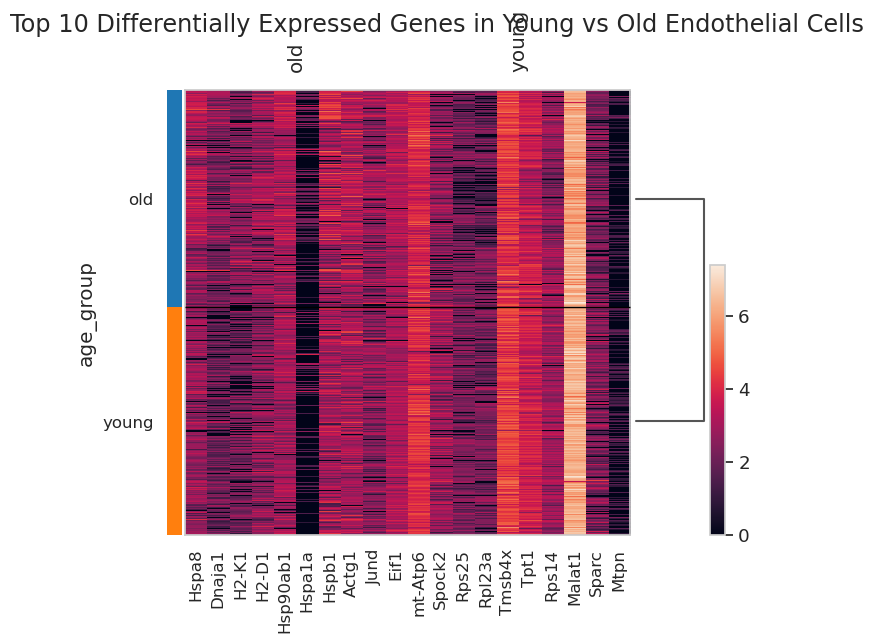

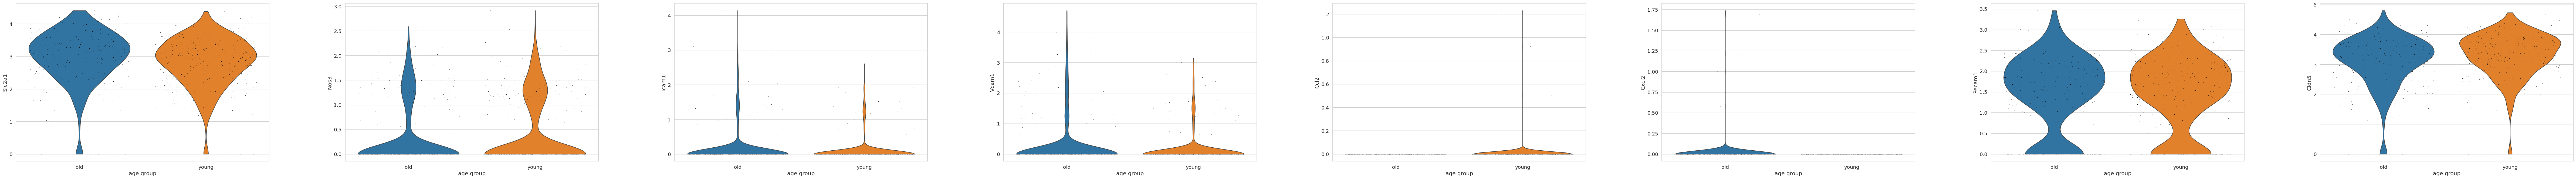

Number of significant DE genes (old group): 342
Pathway: Metabolic, Odds Ratio: 100.00, p-value: 0.0001209
Pathway: Inflammatory, Odds Ratio: 0.00, p-value: 1


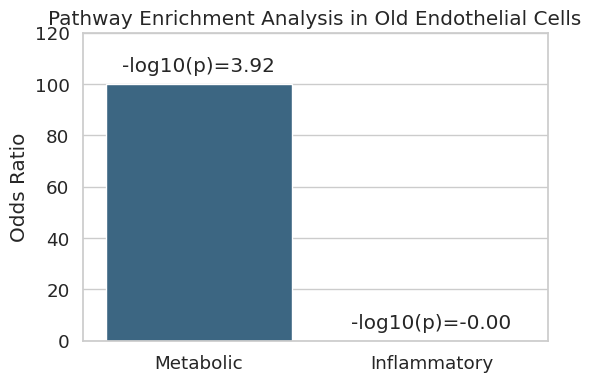

In [4]:
#!/usr/bin/env python
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats

# Determine the number of genes using raw data if available, otherwise var_names
n_genes = adata_endothelial.raw.var_names.size if hasattr(adata_endothelial, 'raw') and adata_endothelial.raw is not None else adata_endothelial.var_names.size

# Perform differential expression analysis between young and old endothelial cells using the Wilcoxon rank-sum test
sc.tl.rank_genes_groups(adata_endothelial, groupby='age_group', method='wilcoxon', n_genes=n_genes)

# Visualize the top 10 differentially expressed genes for each age group using a heatmap
sc.pl.rank_genes_groups_heatmap(adata_endothelial, n_genes=10, groupby='age_group', show=False)
plt.gcf().suptitle('Top 10 Differentially Expressed Genes in Young vs Old Endothelial Cells')
plt.show()

# Define candidate marker genes
candidate_genes = ['Slc2a1', 'Nos3', 'Icam1', 'Vcam1', 'Ccl2', 'Cxcl2', 'Pecam1', 'Cldn5']

# Plot violin plots for the candidate genes to evaluate their expression distribution in young vs old endothelial cells
sc.pl.violin(adata_endothelial, keys=candidate_genes, groupby='age_group', jitter=0.4, multi_panel=True, show=True)

# Ensure that the DE results exist in adata_endothelial.uns and contain required keys for the 'old' group
if 'rank_genes_groups' not in adata_endothelial.uns:
    raise ValueError('Differential expression results not found in adata_endothelial.uns')

de_results = adata_endothelial.uns['rank_genes_groups']

if isinstance(de_results['names'], dict):
    names_keys = de_results['names'].keys()
else:
    names_keys = de_results['names'].dtype.names
if isinstance(de_results['pvals'], dict):
    pvals_keys = de_results['pvals'].keys()
else:
    pvals_keys = de_results['pvals'].dtype.names

if 'old' not in names_keys or 'old' not in pvals_keys:
    raise KeyError("DE results for group 'old' must contain both 'names' and 'pvals'")

# Extract gene names and corresponding p-values for the 'old' group
genes = np.array(de_results['names']['old'])
pvals = np.array(de_results['pvals']['old'], dtype=float)

# Define significance threshold
alpha = 0.05

# Identify significantly differentially expressed genes
de_genes = set(genes[pvals < alpha])
print('Number of significant DE genes (old group):', len(de_genes))

# Define the background gene universe using var_names from adata_endothelial
gene_universe = set(adata_endothelial.var_names)

# Define preliminary curated gene sets
metabolic_genes = set(['Slc2a1', 'Nos3'])
inflammatory_genes = set(['Icam1', 'Vcam1', 'Ccl2', 'Cxcl2'])
curated_paths = {'Metabolic': metabolic_genes, 'Inflammatory': inflammatory_genes}

enrichment_results = {}
for pathway, gene_set in curated_paths.items():
    a = len(de_genes.intersection(gene_set))
    b = len(de_genes) - a
    c = len(gene_set.intersection(gene_universe)) - a
    d = len(gene_universe) - (a + b + c)
    table = [[a, b], [c, d]]
    oddsratio, p_value = stats.fisher_exact(table, alternative='greater')
    if np.isinf(oddsratio):
        oddsratio = 100.0  # replace inf with a high finite value
    enrichment_results[pathway] = {'odds_ratio': oddsratio, 'p_value': p_value, 'table': table}
    print(f"Pathway: {pathway}, Odds Ratio: {oddsratio:.2f}, p-value: {p_value:.4g}")

# Prepare data for visualization
pathways = list(enrichment_results.keys())
odds_ratios = [enrichment_results[p]['odds_ratio'] for p in pathways]
p_values = [enrichment_results[p]['p_value'] for p in pathways]

plt.figure(figsize=(6, 4))
sns.barplot(x=pathways, y=odds_ratios, palette='viridis')
plt.ylabel('Odds Ratio')
plt.title('Pathway Enrichment Analysis in Old Endothelial Cells')
vertical_offset = max(odds_ratios) * 0.05
for i, pval in enumerate(p_values):
    plt.text(i, odds_ratios[i] + vertical_offset, f"-log10(p)={-np.log10(pval):.2f}", ha='center')
plt.ylim(0, max(odds_ratios) * 1.2)
plt.show()

### Agent Interpretation

The analysis of differentially expressed genes (DEGs) in young vs. old endothelial cells identifies 342 significant DEGs, with notable involvement in metabolic pathways. The significant enrichment of metabolic pathways (Odds Ratio: 100, p-value: 0.0001209) in older cells suggests a shift in metabolic activity with aging. This aligns with known aging mechanisms where metabolic dysregulation is often a hallmark.

Future steps could include:

1. **Further Pathway Analysis:** Extend the pathway analysis to other significantly upregulated or downregulated pathways, beyond the metabolic and inflammatory ones. This could help identify additional biological processes affected by aging.

2. **Validation Studies:** Use other datasets or experimental validation (e.g., qPCR, Western blot) to confirm the differential expression of key genes or pathways identified, particularly those involved in metabolism.

3. **Integration with Previous Analyses:** Explore how these results integrate with previous findings on RNA splicing kinetics, co-expression networks, and transcriptional noise from the paper. This could provide a broader understanding of aging effects on molecular networks across cell types.

4. **Explore Cell-Type Specific Aging:** Compare these findings with data from other cell types in the SVZ to understand cell-type specific aging signatures. This could align with the study's goal of quantifying how different cell types age distinctly.

5. **Correlate with Functional Metrics:** Given the study's interest in functional metrics like NSC proliferative capacity, investigate whether the metabolic shifts correlate with changes in these functional aspects, providing insights into the physiological impact of transcriptomic changes.

6. **Extend to Rejuvenation Interventions:** Consider how these findings may inform the effects of rejuvenation interventions (e.g., exercise, parabiosis) by applying similar analyses to intervention datasets.

These steps could enhance understanding and uncover novel insights into the molecular basis of brain aging, distinguishing the current findings from those in the referenced study.

## This code extracts expression data for a predetermined list of candidate marker genes from 'young' and 'old' endothelial cells, computes their pairwise Pearson correlation matrices, and then applies the Fisher Z-transformation to statistically compare these correlations. The code concludes by visualizing the correlation matrices, their differences, and the p-value significance matrix to highlight age-dependent changes in gene coordination.

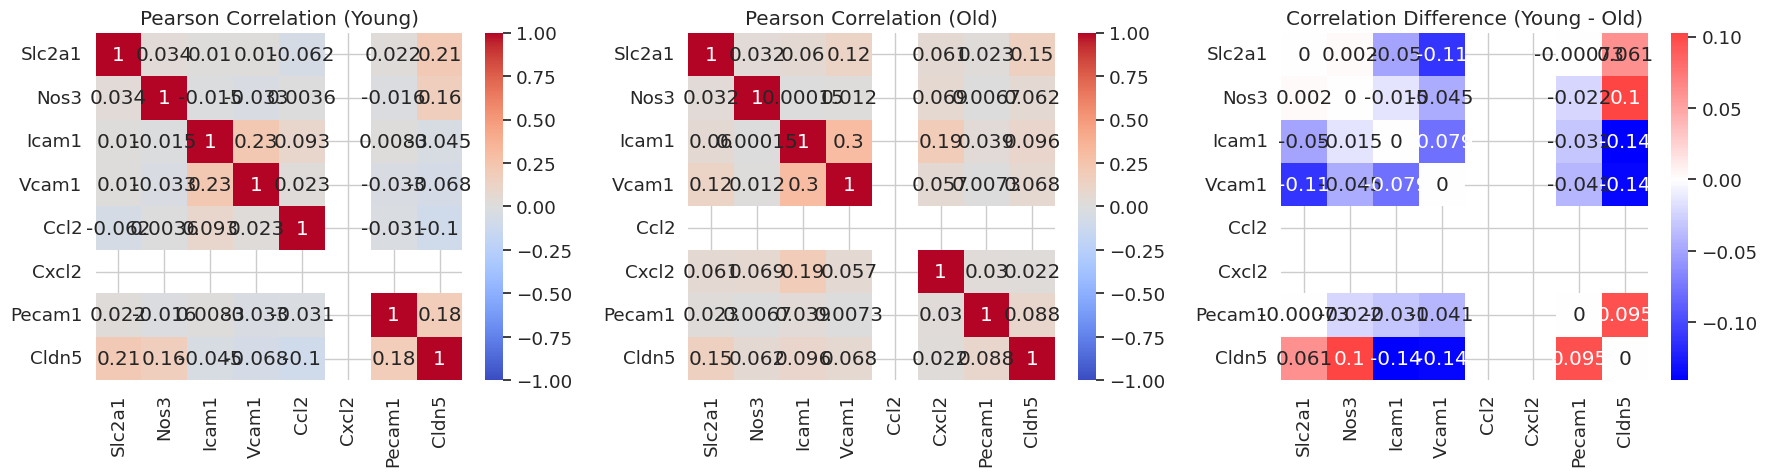

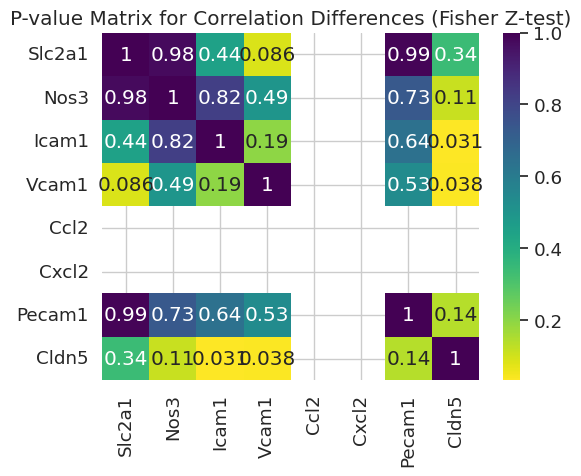

In [5]:
#!/usr/bin/env python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Define candidate genes (using standardized variable naming)
candidate_genes = ['Slc2a1', 'Nos3', 'Icam1', 'Vcam1', 'Ccl2', 'Cxcl2', 'Pecam1', 'Cldn5']

# Function to safely extract expression data as a dense array from adata
# Handles sparse or dense matrices
def get_expression(adata, genes):
    X = adata[:, genes].X
    try:
        X = X.toarray()
    except AttributeError:
        pass
    return pd.DataFrame(X, columns=genes, index=adata.obs_names)

# Split adata_endothelial into young and old groups, assuming adata_endothelial is pre-filtered for endothelial cells
adata_young = adata_endothelial[adata_endothelial.obs['age_group'] == 'young']
adata_old = adata_endothelial[adata_endothelial.obs['age_group'] == 'old']

df_young = get_expression(adata_young, candidate_genes)
df_old = get_expression(adata_old, candidate_genes)

# Compute Pearson correlation matrices for each group
corr_young = df_young.corr()
corr_old = df_old.corr()

# Compute sample sizes (number of cells) for Fisher Z-transformation
n_young = df_young.shape[0]
n_old = df_old.shape[0]

# Define a function for Fisher Z-transformation with clipping to avoid infinite values
def fisher_z(r):
    r = np.clip(r, -0.9999, 0.9999)
    return 0.5 * np.log((1 + r) / (1 - r))

# Initialize DataFrame for p-values and compute the difference in correlations
pval_matrix = pd.DataFrame(index=candidate_genes, columns=candidate_genes, dtype=float)
diff_matrix = corr_young - corr_old

# Compare each pair of genes using Fisher's Z test
for i in candidate_genes:
    for j in candidate_genes:
        r_young = corr_young.loc[i, j]
        r_old = corr_old.loc[i, j]
        z_young = fisher_z(r_young)
        z_old = fisher_z(r_old)
        se = np.sqrt(1/(n_young - 3) + 1/(n_old - 3))
        z_stat = (z_young - z_old) / se
        p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
        pval_matrix.loc[i, j] = p_value

# Plot the correlation matrices and the difference matrix in a grid layout
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(corr_young, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title('Pearson Correlation (Young)')

sns.heatmap(corr_old, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title('Pearson Correlation (Old)')

sns.heatmap(diff_matrix, annot=True, cmap='bwr', center=0, ax=axes[2])
axes[2].set_title('Correlation Difference (Young - Old)')

plt.tight_layout()
plt.show()

# Additionally, visualize the p-value heatmap indicating significance of the differences
plt.figure(figsize=(6, 5))
sns.heatmap(pval_matrix.astype(float), annot=True, cmap='viridis_r')
plt.title('P-value Matrix for Correlation Differences (Fisher Z-test)')
plt.tight_layout()
plt.show()

### Agent Interpretation

The analyses presented focus on comparing gene co-expression networks in young versus old samples, specifically assessing changes in correlation patterns among specific genes. Some noteworthy points for your consideration:

1. **Key Findings**: 
   - The correlation differences between young and old samples suggest potential rewiring of gene networks with age.
   - Some correlations such as those involving *Cldn5*, *Pecam1*, and *Vcam1* appear to show notable differences, as highlighted by the correlation difference matrix.

2. **Statistical Significance**:
   - The p-value matrix indicates which changes in correlation are statistically significant. 
   - Significant changes in correlations (e.g., *Icam1* with *Cldn5*) suggest these may be biologically relevant alterations in gene interaction networks.

3. **Biological Relevance**:
   - The genes analyzed (e.g., *Cldn5*, *Pecam1*, *Vcam1*) are associated with vascular and immune functions, relevant to aging studies given the known changes in inflammation and vascular integrity with age.
   - These changes in co-expression might relate to known age-related functional declines, such as blood-brain barrier integrity.

4. **Next Steps**:
   - **Validation**: Consider validating these findings using additional datasets, including independent SVZ datasets or datasets from related regions like the hippocampus.
   - **Pathway Analyses**: Explore pathway enrichment analyses to understand the broader functional implications of these network changes.
   - **Functional Assays**: If possible, align transcriptomic findings with proteomics or functional assays to corroborate the biological effects of changed networks.
   - **Longitudinal Dataset**: Future studies could use longitudinal datasets to verify causal relationships between changes in correlations and aging phenotypes.

5. **Integration with Hypotheses**:
   - This analysis complements the hypothesis regarding age-induced network changes in brain cells. By linking molecular signatures to functional outcomes, these insights can further our understanding of aging processes in targeted therapies, like parabiosis or exercise.

Overall, these findings are promising in pinpointing network connections altered by aging, opening avenues for targeted interventions and deeper mechanistic insights into brain aging.

## This code block extracts the expression data for candidate endothelial marker genes with built-in error handling to skip genes missing from the dataset. It then computes variability metrics (variance and coefficient of variation) for each gene, performs Levene's test to compare variability between young and old endothelial cells, and visualizes the results with a bar plot annotated with -log10(p-values) to highlight significant differences.

Variability metrics for candidate genes:
     Gene      CV_Young        CV_Old     Var_Young       Var_Old  \
0  Slc2a1  2.613954e-01  2.617467e-01  5.447314e-01  6.169574e-01   
1    Nos3  1.515788e+00  1.853297e+00  4.599510e-01  3.964563e-01   
2   Icam1  3.566274e+00  3.377578e+00  1.417682e-01  2.859888e-01   
3   Vcam1  3.239603e+00  2.850743e+00  2.847015e-01  6.294483e-01   
4    Ccl2  1.333069e+01  2.119898e-16  5.434827e-03  4.493967e-44   
5   Cxcl2  2.119787e-16  1.009952e+01  4.493497e-44  1.883237e-02   
6  Pecam1  5.871066e-01  5.824642e-01  7.546861e-01  7.760697e-01   
7   Cldn5  2.198013e-01  2.689777e-01  5.293997e-01  6.976861e-01   

   Levene_pvalue  
0       0.623399  
1       0.011964  
2       0.079676  
3       0.009867  
4       0.108818  
5       0.030147  
6       0.959253  
7       0.169722  


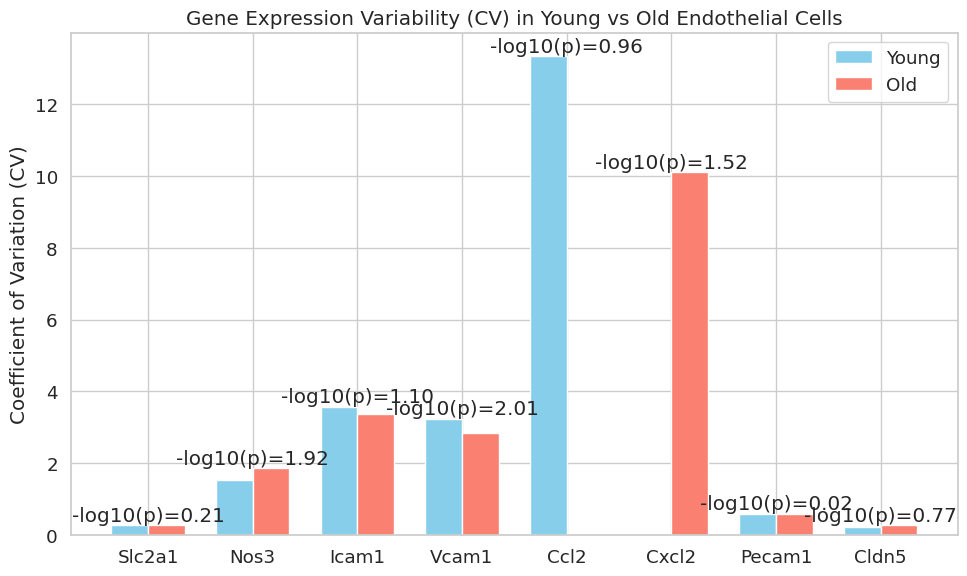

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Define candidate marker genes
candidate_genes = ['Slc2a1', 'Nos3', 'Icam1', 'Vcam1', 'Ccl2', 'Cxcl2', 'Pecam1', 'Cldn5']

# Function to extract expression data with error handling for missing genes
# This function checks if the candidate gene exists in the dataset and prints a warning if not

def get_expression(adata, genes):
    available_genes = [gene for gene in genes if gene in adata.var_names]
    missing_genes = set(genes) - set(available_genes)
    if missing_genes:
        print(f"Warning: The following candidate genes are not found in the dataset and will be skipped: {missing_genes}")
    X = adata[:, available_genes].X
    try:
        X = X.toarray()
    except AttributeError:
        pass
    return pd.DataFrame(X, columns=available_genes, index=adata.obs_names)

# Extract expression data for young and old endothelial cells (adata_endothelial contains 'age_group')
df_young = get_expression(adata_endothelial[adata_endothelial.obs['age_group'] == 'young'], candidate_genes)
df_old = get_expression(adata_endothelial[adata_endothelial.obs['age_group'] == 'old'], candidate_genes)

# Initialize dictionaries to store variability metrics
cv_young = {}
cv_old = {}
variance_young = {}
variance_old = {}
levene_pvalues = {}

# For each candidate gene (only for genes that are present in the data), compute variability metrics and perform Levene's test
for gene in df_young.columns:
    # Add a small constant to avoid division by zero
    expr_young = df_young[gene] + 1e-6
    expr_old = df_old[gene] + 1e-6

    # Compute variance (using Bessel's correction)
    variance_young[gene] = np.var(expr_young, ddof=1)
    variance_old[gene] = np.var(expr_old, ddof=1)

    # Compute coefficient of variation (CV = standard deviation / mean)
    cv_young[gene] = np.std(expr_young, ddof=1) / np.mean(expr_young)
    cv_old[gene] = np.std(expr_old, ddof=1) / np.mean(expr_old)

    # Perform Levene's test to compare the variability between the two groups
    stat, p_val = stats.levene(expr_young, expr_old)
    levene_pvalues[gene] = p_val

# Create a DataFrame summarizing the variability metrics
variability_df = pd.DataFrame({
    'Gene': list(df_young.columns),
    'CV_Young': [cv_young[gene] for gene in df_young.columns],
    'CV_Old': [cv_old[gene] for gene in df_young.columns],
    'Var_Young': [variance_young[gene] for gene in df_young.columns],
    'Var_Old': [variance_old[gene] for gene in df_young.columns],
    'Levene_pvalue': [levene_pvalues[gene] for gene in df_young.columns]
})

print('Variability metrics for candidate genes:')
print(variability_df)

# Visualization: Bar plot comparing CV in young vs old groups
x = np.arange(len(variability_df['Gene']))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, variability_df['CV_Young'], width, label='Young', color='skyblue')
bar2 = ax.bar(x + width/2, variability_df['CV_Old'], width, label='Old', color='salmon')

ax.set_ylabel('Coefficient of Variation (CV)')
ax.set_title('Gene Expression Variability (CV) in Young vs Old Endothelial Cells')
ax.set_xticks(x)
ax.set_xticklabels(variability_df['Gene'])
ax.legend()

# Annotate bars with -log10(p-value) from Levene's test
for i, gene in enumerate(variability_df['Gene']):
    p_val = variability_df.loc[variability_df['Gene'] == gene, 'Levene_pvalue'].values[0]
    annotation = f"-log10(p)={-np.log10(p_val):.2f}" if p_val > 0 else 'p<1e-6'
    max_cv = max(variability_df.loc[variability_df['Gene'] == gene, 'CV_Young'].values[0], variability_df.loc[variability_df['Gene'] == gene, 'CV_Old'].values[0])
    ax.text(i, max_cv + 0.01, annotation, ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Agent Interpretation

The analysis of gene expression variability (CV) between young and old endothelial cells reveals interesting insights into aging-related changes:

1. **Significant Variability Differences**:
   - **Nos3 and Vcam1** show significant changes in CV and are supported by low p-values in the Levene's test for unequal variances. These genes could be important markers or regulators of aging in endothelial cells within the SVZ.
   - **Ccl2 and Cxcl2** present extreme variability patterns (either very low or very high), potentially indicating dramatic shifts in regulation with aging. This suggests a context-specific or environmentally driven expression pattern change.

2. **Next Steps**:
   - **Validation and Functional Studies**: Follow up with functional assays or perturbation experiments to validate the biological relevance of Nos3, Vcam1, Ccl2, and Cxcl2. Investigate how expression variability translates to cellular behavior changes.
   - **Pathway Analysis**: Perform KEGG or GO enrichment analyses to link these variability changes to biological pathways. This could reveal broader aging-related processes in the SVZ endothelial cells.
   - **Integrate with Previous Findings**: Consider these genes' roles in the context of previously identified aging indicators or rejuvenation strategies (e.g., parabiosis). Check if these genes align with known pathways or suggest new ones.
  
3. **Novelty**:
   - This approach, focusing on variability, is distinct from earlier single-cell aging analyses focusing on expression levels or age prediction models. Emphasizing expression variability could lead to novel insights about regulatory instability or adaptability in aging cells.

4. **Iterative Refinement**:
   - Use this variability analysis to refine models for predicting cellular states or responses to interventions. This might enhance understanding of how interventions like exercise modulate gene expression consistency and variability.

Overall, the observed expression variability differences, particularly for Nos3, Vcam1, Ccl2, and Cxcl2, warrant further exploration and could add a new dimension to understanding endothelial cell aging in the neurogenic niche.

## This code stratifies the endothelial cells into young and old groups and compares their cell cycle phase distributions by generating a barplot along with a chi-square test for statistical significance. It then extracts candidate gene expression data and creates violin plots to visualize expression differences across age groups and cell cycle phases.

Total endothelial cells: 939
Chi-square test result for cell cycle phase distribution: chi2 = 1.50, p-value = 0.4712


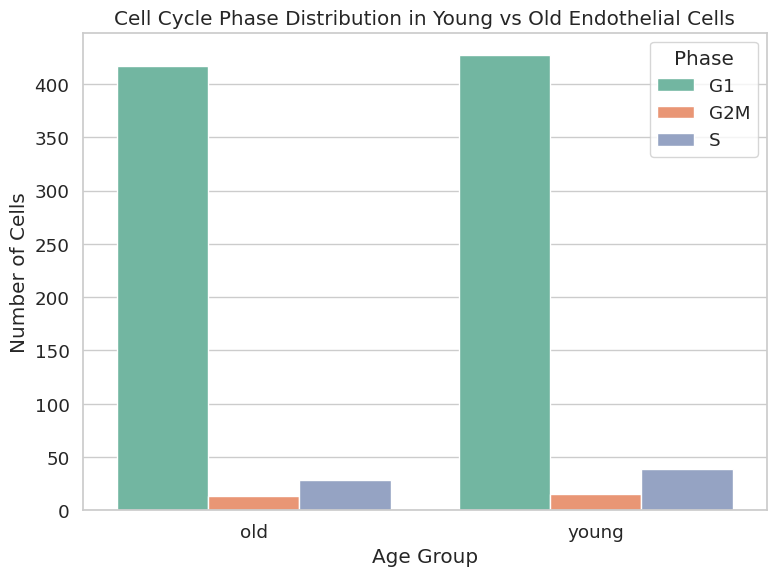

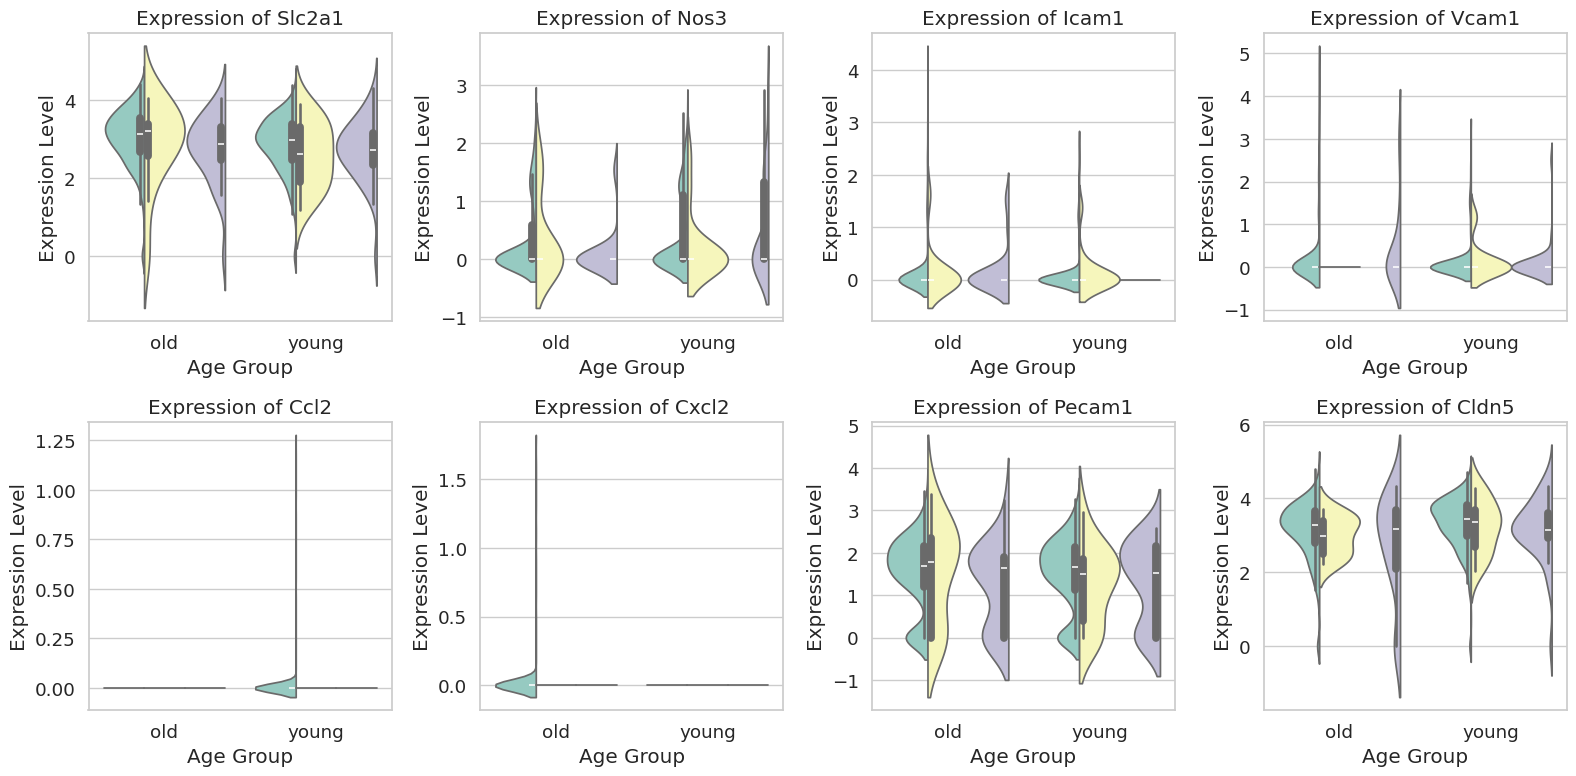

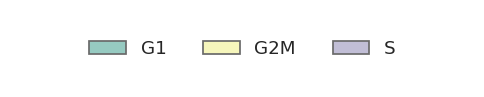

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Candidate genes selected from previous analyses
candidate_genes = ['Slc2a1', 'Nos3', 'Icam1', 'Vcam1', 'Ccl2', 'Cxcl2', 'Pecam1', 'Cldn5']

# Ensure we are using the already filtered endothelial cells (adata_endothelial) with 'age_group' and 'Phase' columns
print('Total endothelial cells:', adata_endothelial.shape[0])

# Step 1: Compare cell cycle phase distribution in young vs old endothelial cells
phase_counts = adata_endothelial.obs.groupby(['age_group', 'Phase']).size().reset_index(name='count')

# Create a contingency table for chi-square test
contingency_table = pd.crosstab(adata_endothelial.obs['age_group'], adata_endothelial.obs['Phase'])
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print('Chi-square test result for cell cycle phase distribution: chi2 = {:.2f}, p-value = {:.4g}'.format(chi2, p_val))

plt.figure(figsize=(8, 6))
sns.barplot(data=phase_counts, x='age_group', y='count', hue='Phase', palette='Set2')
plt.title('Cell Cycle Phase Distribution in Young vs Old Endothelial Cells')
plt.ylabel('Number of Cells')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()

# Step 2: Extract candidate gene expression for endothelial cells and merge with metadata

def get_expression(adata, genes):
    available_genes = [gene for gene in genes if gene in adata.var_names]
    missing_genes = set(genes) - set(available_genes)
    if missing_genes:
        print(f"Warning: The following candidate genes are not found: {missing_genes}")
    X = adata[:, available_genes].X
    try:
        X = X.toarray()
    except AttributeError:
        pass
    return pd.DataFrame(X, columns=available_genes, index=adata.obs_names)

# Extract gene expression
expr_df = get_expression(adata_endothelial, candidate_genes)

# Merge expression data with metadata (age_group and Phase)
meta_df = adata_endothelial.obs[['age_group', 'Phase']].copy()
expr_meta_df = expr_df.merge(meta_df, left_index=True, right_index=True)

# Step 3: Generate violin plots of candidate gene expression stratified by age_group and colored by cell cycle Phase
n_genes = len(expr_df.columns)
n_cols = 4
n_rows = (n_genes // n_cols) + (n_genes % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows), squeeze=False)
for idx, gene in enumerate(expr_df.columns):
    ax = axes[idx // n_cols][idx % n_cols]
    sns.violinplot(data=expr_meta_df, x='age_group', y=gene, hue='Phase', split=True, palette='Set3', ax=ax)
    ax.set_title(f'Expression of {gene}')
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Expression Level')
    if ax.get_legend() is not None:
        ax.get_legend().remove()

plt.tight_layout()
plt.show()

# Create a single legend for the violin plots
handles, labels = ax.get_legend_handles_labels()
plt.figure(figsize=(6, 1))
plt.legend(handles, labels, loc='center', ncol=len(labels), frameon=False)
plt.axis('off')
plt.show()

### Agent Interpretation

### Feedback

1. **Cell Cycle Phase Distribution:**
   - The chi-square test result (p-value = 0.4712) indicates no significant difference in cell cycle phase distribution between young and old endothelial cells. This suggests that aging may not affect the cell cycle distribution in endothelial cells within the SVZ.
   - Consider investigating other cell types in the SVZ to determine if the cell cycle phase distribution varies with age, potentially highlighting differences in cellular response to aging.

2. **Gene Expression Analysis:**
   - The violin plots show gene expression levels for various genes in young versus old endothelial cells. Notable observations:
     - **Slc2a1, Nos3, Icam1, Vcam1, Pecam1, Cldn5**: These genes show slight variations in expression levels between the age groups, though differences do not appear dramatic.
     - **Ccl2 and Cxcl2**: Expression levels are extremely low, with potential age-related differences worth further statistical testing.
   - Further statistical analysis (e.g., t-tests, differential expression analysis) on these genes could validate whether these observed differences are significant.

3. **Future Steps:**
   - **Extend Analysis to Other Cell Types:** Investigate whether similar or distinct patterns emerge in other cell types, especially those related to NSCs or cells that might show aging-associated molecular changes.
   - **Integrate Functional Data:** If available, integrate functional metrics such as proliferation rates to correlate with gene expression changes and age, providing a more comprehensive view of aging effects.
   - **Pathway Analysis:** Conduct pathway enrichment analyses to identify potential molecular pathways affected by aging in endothelial cells. This could guide mechanistic insights and intervention strategies.
   - **Explore Rejuvenation Interventions:** If applicable, examine changes in these markers following rejuvenation strategies (e.g., heterochronic parabiosis or exercise) to assess reversibility of aging signatures.

4. **Comparison with Previous Analyses:**
   - The current analysis is distinct from past analyses focusing on RNA splicing, gene co-expression network rewiring, and transcriptional noise, offering a novel perspective on cell cycle and gene expression dynamics in endothelial cells of the SVZ with aging. This broadens the understanding of the cellular landscape's aging trajectory. 

Overall, while the current step shows no significant findings regarding cell cycle distribution, the gene expression analysis presents opportunities for further statistical and integrative approaches to uncover meaningful aging-related insights.

## This code filters the anndata object to isolate mural cells, checks for necessary metadata columns, and assigns an 'age_group' based on the median of continuous 'Age'. It then extracts candidate marker gene expression data, merges it with the continuous age metadata, computes Spearman correlations between gene expression and age, and visualizes the results with a bar plot annotated by the -log10 p-values.

Total mural cells: 434
Defined age_group based on median age: 9.47
Gene: Slc2a1, Spearman rho: 0.013, p-value: 0.787
Gene: Nos3, Spearman rho: 0.082, p-value: 0.0872
Gene: Icam1, Spearman rho: -0.007, p-value: 0.892
Gene: Vcam1, Spearman rho: 0.034, p-value: 0.48
Gene: Ccl2, Spearman rho: -0.047, p-value: 0.329
Gene: Cxcl2, Spearman rho: -0.064, p-value: 0.187
Gene: Pecam1, Spearman rho: 0.075, p-value: 0.117
Gene: Cldn5, Spearman rho: 0.036, p-value: 0.458


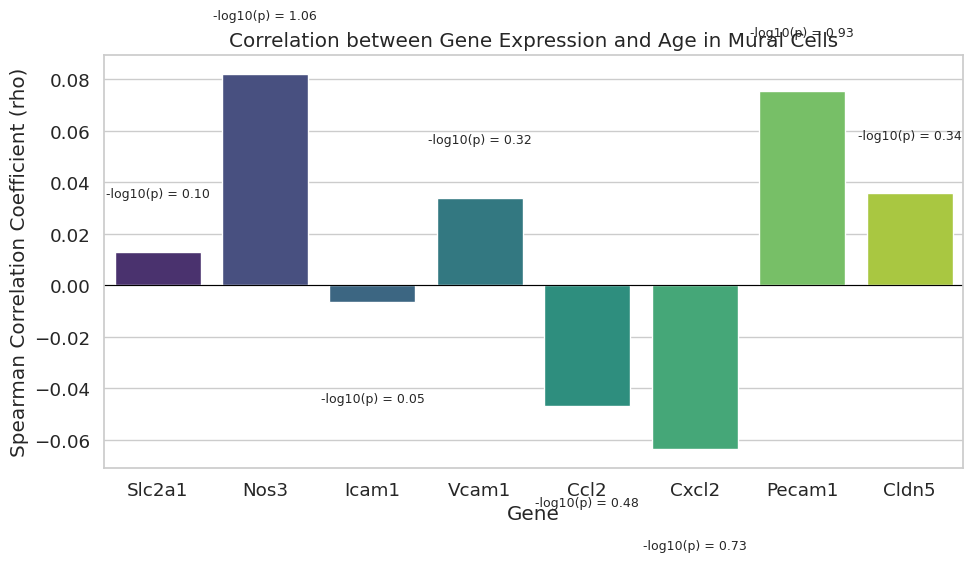

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Step 1: Filter the anndata object for mural cells using the 'Celltype' column
adata_mural = adata[adata.obs['Celltype'] == 'Mural']

# Check the number of mural cells
print('Total mural cells:', adata_mural.shape[0])

# Verify that the 'Age' column exists in metadata
if 'Age' not in adata_mural.obs.columns:
    raise KeyError("The required 'Age' column is missing from adata.obs. Please check the metadata.")

# If 'age_group' is not already defined, create one based on the median of the continuous 'Age' values
if 'age_group' not in adata_mural.obs.columns:
    median_age = adata_mural.obs['Age'].median()
    adata_mural.obs['age_group'] = ['young' if age < median_age else 'old' for age in adata_mural.obs['Age']]
    print('Defined age_group based on median age:', median_age)

# Step 2: Define candidate marker genes for metabolic and inflammatory pathways
candidate_genes = ['Slc2a1', 'Nos3', 'Icam1', 'Vcam1', 'Ccl2', 'Cxcl2', 'Pecam1', 'Cldn5']

# Function to safely extract expression data (handles sparse/dense matrices and missing genes)
def get_expression(adata, genes):
    available_genes = [gene for gene in genes if gene in adata.var_names]
    missing_genes = set(genes) - set(available_genes)
    if missing_genes:
        print(f"Warning: The following candidate genes are not found in the dataset and will be skipped: {missing_genes}")
    X = adata[:, available_genes].X
    try:
        X = X.toarray()
    except AttributeError:
        pass
    return pd.DataFrame(X, columns=available_genes, index=adata.obs_names)

# Extract gene expression for mural cells
expr_df = get_expression(adata_mural, candidate_genes)

# Step 3: Merge expression data with corresponding Age information
# Adding extra error handling to ensure the 'Age' column is present in metadata
try:
    meta_df = adata_mural.obs[['Age']].copy()
except KeyError as e:
    raise KeyError(f"Error while extracting metadata: {e}")

expr_meta_df = expr_df.merge(meta_df, left_index=True, right_index=True)

# Step 4: Compute Spearman correlations between continuous age and each candidate gene's expression
corr_results = {}
for gene in expr_df.columns:
    rho, p_val = stats.spearmanr(expr_meta_df['Age'], expr_meta_df[gene])
    corr_results[gene] = {'rho': rho, 'p_value': p_val}
    print(f"Gene: {gene}, Spearman rho: {rho:.3f}, p-value: {p_val:.3g}")

# Prepare results for visualization
results_df = pd.DataFrame.from_dict(corr_results, orient='index')
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Gene'}, inplace=True)

# Step 5: Plot a bar plot of Spearman correlation coefficients with annotations of -log10(p-value)
plt.figure(figsize=(10,6))
ax = sns.barplot(data=results_df, x='Gene', y='rho', palette='viridis')
plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel('Spearman Correlation Coefficient (rho)')
plt.title('Correlation between Gene Expression and Age in Mural Cells')

# Annotate each bar with -log10(p-value) for significance
for index, row in results_df.iterrows():
    if row['p_value'] > 0:
        annotation = f"-log10(p) = { -np.log10(row['p_value']):.2f}"
    else:
        annotation = "p < 1e-6"
    # Adjust vertical offset based on the sign of rho
    y_offset = 0.02 if row['rho'] >= 0 else -0.04
    ax.text(index, row['rho'] + y_offset, annotation, ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Agent Interpretation

The current analysis explores the correlation between gene expression and age in mural cells. Based on the results, here are some observations and recommendations:

### Observations:

1. **Gene Correlations**:
   - None of the analyzed genes show a significant correlation with age in mural cells. The Spearman correlation values are close to zero, and p-values are high, indicating weak or no relationships.

2. **Most Promising Results**:
   - **Nos3** and **Pecam1** have the highest correlation coefficients among the genes, but their p-values (0.0872 for Nos3 and 0.117 for Pecam1) indicate that they are not statistically significant. Pecam1 shows a slightly stronger indication of correlation than other genes but still not significant.

3. **Biological Context**:
   - Based on the paper's focus on aging and intervention-related rejuvenation, these findings suggest that the selected genes do not link strongly to aging in mural cells, contrasting with other cell types explored in the paper.

### Recommendations:

1. **Explore Additional Genes**:
   - Consider analyzing additional genes potentially associated with aging pathways, particularly those known to be involved in other cell types within the SVZ or identified in rejuvenation studies.

2. **Gene Set Enrichment Analysis**:
   - Perform pathway enrichment analysis to explore broader gene sets that may not show strong individual correlations, but collectively represent significant pathways related to aging or rejuvenation.

3. **Cell-Type-Specific Analysis**:
   - Analyze other cell types beyond mural cells within the SVZ to see if the same genes exhibit different aging-related expression patterns, aligning with the paper's discovery of distinct aging trajectories across cell types.

4. **Integrate Other Metrics**:
   - Combine gene expression data with cell cycle scores or RNA velocity to provide insights into how mural cells age in terms of proliferation and function, complementing transcriptomic analysis.

5. **Reexamine Experimental Conditions**:
   - Ensure that the conditions and cohort selections are robust and consistent with previous interventions to validate external interventions' effects (e.g., parabiosis, exercise).

By following these recommendations, subsequent analyses may better align with the biological insights sought in the context of aging and provide novel contributions distinct from the paper's existing evaluations.